In [1]:
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

In [2]:
# Load IMDb datasets for movie ratings and basic movie information and store it in dataframe variables
imdb_ratings = pd.read_csv('title.ratingsNEW.tsv.gz', sep='\t', low_memory=False)

title_basics = pd.read_csv('title.basicsNEW.tsv.gz', sep='\t', low_memory=False)

In [3]:
#Display the first 5 rows of the ratings dataset
print(imdb_ratings.head())

      tconst  averageRating  numVotes
0  tt0000001            5.7      2041
1  tt0000002            5.7       272
2  tt0000003            6.5      1993
3  tt0000004            5.4       178
4  tt0000005            6.2      2751


In [ ]:
# Set display format to avoid scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)

In [4]:
#Check the column-wise info of the ratings dataset
imdb_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1420877 entries, 0 to 1420876
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1420877 non-null  object 
 1   averageRating  1420877 non-null  float64
 2   numVotes       1420877 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 32.5+ MB


In [5]:
#Rename columuns and print first 5 rows again
imdb_ratings.columns = ["ID", "Average Rating", "Number of Ratings"]
print(imdb_ratings.head())

          ID  Average Rating  Number of Ratings
0  tt0000001             5.7               2041
1  tt0000002             5.7                272
2  tt0000003             6.5               1993
3  tt0000004             5.4                178
4  tt0000005             6.2               2751


In [6]:
#Check if there are any titles that don't have ratings
imdb_ratings.isnull().sum()

ID                   0
Average Rating       0
Number of Ratings    0
dtype: int64

In [7]:
f'If this number {len(imdb_ratings["ID"].unique())} is equal to {imdb_ratings["ID"].count()}, then all the titles rated in this dataset are unique.'

'If this number 1420877 is equal to 1420877, then all the titles rated in this dataset are unique.'

In [8]:
imdb_ratings['Average Rating'].value_counts()

Average Rating
7.2    53466
7.4    51173
7.6    50585
7.8    49787
7.0    48685
       ...  
1.6      475
1.4      428
1.2      411
1.3      340
1.1      326
Name: count, Length: 91, dtype: int64

In [9]:
imdb_ratings['Average Rating'].describe()

count    1.420877e+06
mean     6.954061e+00
std      1.388065e+00
min      1.000000e+00
25%      6.200000e+00
50%      7.100000e+00
75%      7.900000e+00
max      1.000000e+01
Name: Average Rating, dtype: float64

<Axes: >

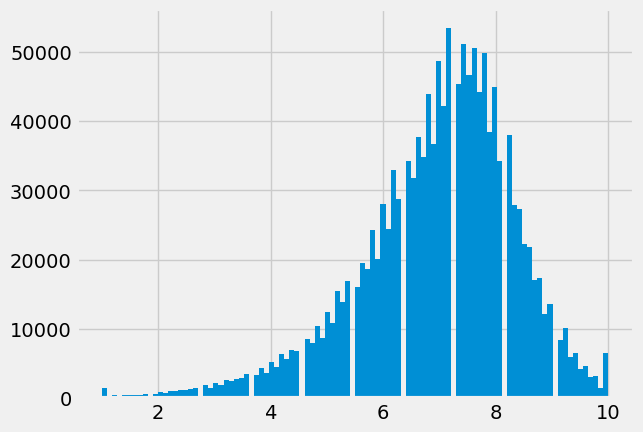

In [10]:
#Create a histogram of the average ratings to visualize the distribution
imdb_ratings['Average Rating'].hist(bins=100)

In [11]:
title_basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [12]:
#rename columns
title_basics.columns = ["ID", "Title Type", "Primary Title", "Original Title", "Is Adult", "Start Year", "End Year", "Runtime (minutes)", "Genres"]
title_basics

,ID,Title Type,Primary Title,Original Title,Is Adult,Start Year,End Year,Runtime (minutes),Genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
...,...,...,...,...,...,...,...,...,...
10851639,tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0,2009,\N,\N,"Action,Drama,Family"
10851640,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0,2010,\N,\N,"Action,Drama,Family"
10851641,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0,2010,\N,\N,"Action,Drama,Family"
10851642,tt9916856,short,The Wind,The Wind,0,2015,\N,27,Short


In [13]:
title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10851644 entries, 0 to 10851643
Data columns (total 9 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   ID                 object
 1   Title Type         object
 2   Primary Title      object
 3   Original Title     object
 4   Is Adult           object
 5   Start Year         object
 6   End Year           object
 7   Runtime (minutes)  object
 8   Genres             object
dtypes: object(9)
memory usage: 745.1+ MB


In [14]:
title_basics.describe()

,ID,Title Type,Primary Title,Original Title,Is Adult,Start Year,End Year,Runtime (minutes),Genres
count,10851644,10851644,10851626,10851626,10851644,10851644,10851644,10851644,10851434
unique,10851644,11,4801340,4824778,28,153,97,909,2371
top,tt0000001,tvEpisode,Episode #1.1,Episode #1.1,0,\N,\N,\N,Drama
freq,1,8264141,52059,52059,10508939,1404468,10726338,7420570,1232559


In [15]:
#Convert Numerical Columns, coerce converts any conversion errors into NaN values, astype("Int64") converts values back to integer type explicitly
title_basics['Start Year'] = pd.to_numeric(title_basics['Start Year'], errors='coerce').astype('Int64')
title_basics['End Year'] = pd.to_numeric(title_basics['End Year'], errors='coerce').astype('Int64')
title_basics['Runtime (minutes)'] = pd.to_numeric(title_basics['Runtime (minutes)'], errors='coerce')

In [16]:
title_basics.isnull().sum()

ID                          0
Title Type                  0
Primary Title              18
Original Title             18
Is Adult                    0
Start Year            1404468
End Year             10726338
Runtime (minutes)     7420780
Genres                    210
dtype: int64

In [17]:
title_basics

,ID,Title Type,Primary Title,Original Title,Is Adult,Start Year,End Year,Runtime (minutes),Genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,<NA>,1.0,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,<NA>,5.0,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,<NA>,4.0,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,<NA>,12.0,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,<NA>,1.0,"Comedy,Short"
...,...,...,...,...,...,...,...,...,...
10851639,tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0,2009,<NA>,NaN,"Action,Drama,Family"
10851640,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0,2010,<NA>,NaN,"Action,Drama,Family"
10851641,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0,2010,<NA>,NaN,"Action,Drama,Family"
10851642,tt9916856,short,The Wind,The Wind,0,2015,<NA>,27.0,Short


In [18]:
# Counting the number of occurrences of each unique value in the 'Is Adult' column
unique_value_counts = title_basics['Is Adult'].value_counts()

# Printing the counts
print(unique_value_counts)


Is Adult
0       10508939
1         342495
1985          29
2015          28
1978          25
2016          20
2017          17
1984          14
1987          10
2018           9
2020           9
2013           8
2019           7
2014           6
2023           6
1983           6
1986           2
1980           2
1982           2
2022           2
1977           1
1981           1
\N             1
1979           1
2021           1
2012           1
2011           1
2005           1
Name: count, dtype: int64


In [19]:
# Replace values that are not '0' or '1' with NaN
title_basics['Is Adult'] = pd.to_numeric(title_basics['Is Adult'], errors='coerce')

# Any value that is not 0 or 1 is now NaN. Convert the column to boolean
# NaN values will remain as NaN
title_basics['Is Adult'] = title_basics['Is Adult'].map({0: False, 1: True})

# Check the unique values again
print(title_basics['Is Adult'].unique())

# Check the DataFrame
print(title_basics)

[False True nan]
                 ID Title Type              Primary Title  \
0         tt0000001      short                 Carmencita   
1         tt0000002      short     Le clown et ses chiens   
2         tt0000003      short             Pauvre Pierrot   
3         tt0000004      short                Un bon bock   
4         tt0000005      short           Blacksmith Scene   
...             ...        ...                        ...   
10851639  tt9916848  tvEpisode              Episode #3.17   
10851640  tt9916850  tvEpisode              Episode #3.19   
10851641  tt9916852  tvEpisode              Episode #3.20   
10851642  tt9916856      short                   The Wind   
10851643  tt9916880  tvEpisode  Horrid Henry Knows It All   

                     Original Title Is Adult  Start Year  End Year  \
0                        Carmencita    False        1894      <NA>   
1            Le clown et ses chiens    False        1892      <NA>   
2                    Pauvre Pierrot    F

In [22]:
#Finding the number of unique values in the start year column that aren't years

#Create a copy of the Star Year column in string format
start_year_as_string  = title_basics['Start Year'].astype(str)

# Filer out four-digit numbers from the column
non_four_digit_years = start_year_as_string.apply(lambda x: x if len(x) != 4 else None)

#Count the unique values that aren't years (four-digit values)

non_four_digit_years_counts = non_four_digit_years.value_counts(dropna=True)

print(non_four_digit_years_counts)

Series([], Name: count, dtype: int64)


In [24]:
# Check how many movies were release after 2023
unique_years_counts_after_2023 = title_basics[title_basics['Start Year'] > 2023]['Start Year'].value_counts()



Series([], Name: count, dtype: Int64)

In [23]:
#Since we are only interested in analyzing movies from the past 100 years, we can filter our data to exclude movies prior to 1920
#But we must also filter our start year data to remove movies produced in 2024 because of incomplete data or movies released after 2024 because of input errors

title_basics = title_basics[(title_basics['Start Year'] <= 2023) & (title_basics['Start Year'] >= 1920)]

In [25]:
# Find the number of unique types of films
count_unique_filmtypes = title_basics['Title Type'].value_counts()
print(count_unique_filmtypes)

Title Type
tvEpisode       6961076
short            881130
movie            589176
video            290559
tvSeries         243457
tvMovie          143897
tvMiniSeries      50617
tvSpecial         46838
videoGame         37135
tvShort           10383
tvPilot               1
Name: count, dtype: int64


In [26]:
# filter movie_basics df to include only rows where the Title Type column has values 'movie' or 'tvMovie'
filtered_movies = title_basics[title_basics['Title Type'].isin(['movie', 'tvMovie'])]

# Check the first few rows of the filtered DataFrame
print(filtered_movies.head())

             ID Title Type       Primary Title      Original Title Is Adult  \
3846  tt0003854      movie    Dodge City Trail    Dodge City Trail    False   
5067  tt0005076      movie      Charley's Aunt      Charley's Aunt    False   
5920  tt0005929      movie   The Prince of Pep   The Prince of Pep    False   
6616  tt0006626      movie   Elnémult harangok   Elnémult harangok    False   
8410  tt0008422      movie  Perils of the West  Perils of the West    False   

      Start Year  End Year  Runtime (minutes)               Genres  
3846        1936      <NA>               56.0  Drama,Music,Western  
5067        1925      <NA>               80.0               Comedy  
5920        1925      <NA>                NaN       Drama,Thriller  
6616        1922      <NA>               52.0                   \N  
8410        1922      <NA>                NaN              Western  


In [27]:
filtered_movies.isnull().sum()

ID                        0
Title Type                0
Primary Title             2
Original Title            2
Is Adult                  0
Start Year                0
End Year             733073
Runtime (minutes)    192680
Genres                    0
dtype: int64

In [33]:
#Since we already have primary title we can remove the original title column 
#End Year column can be deleted as well as we are only looking at movies and no TV shows are include

#Drop the "Original Title" and "End Year" columns (axis=1 indicates that columns are being dropped not rows and inplace=True marks changes to the datafram as permenant)

filtered_movies = filtered_movies.drop(['Original Title', 'End Year'], axis=1)

#Rename the Start Year as the Release Year and Primary Title as Title Name
filtered_movies = filtered_movies.rename(columns={'Start Year': "Release Year", "Primary Title": "Title Name"})

In [34]:
filtered_movies

,ID,Title Type,Title Name,Is Adult,Release Year,Runtime (minutes),Genres
3846,tt0003854,movie,Dodge City Trail,False,1936,56.0,"Drama,Music,Western"
5067,tt0005076,movie,Charley's Aunt,False,1925,80.0,Comedy
5920,tt0005929,movie,The Prince of Pep,False,1925,NaN,"Drama,Thriller"
6616,tt0006626,movie,Elnémult harangok,False,1922,52.0,\N
8410,tt0008422,movie,Perils of the West,False,1922,NaN,Western
...,...,...,...,...,...,...,...
10851562,tt9916680,movie,De la ilusión al desconcierto: cine colombiano...,False,2007,100.0,Documentary
10851567,tt9916692,tvMovie,Teatroteka: Czlowiek bez twarzy,False,2015,66.0,Drama
10851574,tt9916706,movie,Dankyavar Danka,False,2013,NaN,Comedy
10851584,tt9916730,movie,6 Gunn,False,2017,116.0,Drama


In [32]:
filtered_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 733073 entries, 3846 to 10851594
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ID                 733073 non-null  object 
 1   Title Type         733073 non-null  object 
 2   Primary Title      733071 non-null  object 
 3   Is Adult           733073 non-null  object 
 4   Release Year       733073 non-null  Int64  
 5   Runtime (minutes)  540393 non-null  float64
 6   Genres             733073 non-null  object 
dtypes: Int64(1), float64(1), object(5)
memory usage: 45.4+ MB


In [36]:
#Keep only movies with a known start year
filtered_movies = filtered_movies.dropna(subset=['Release Year'])

#Keep movies that have a title
filtered_movies = filtered_movies[filtered_movies['Title Name'].notna()] 

filtered_movies.info()
filtered_movies.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 733071 entries, 3846 to 10851594
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ID                 733071 non-null  object 
 1   Title Type         733071 non-null  object 
 2   Title Name         733071 non-null  object 
 3   Is Adult           733071 non-null  object 
 4   Release Year       733071 non-null  Int64  
 5   Runtime (minutes)  540392 non-null  float64
 6   Genres             733071 non-null  object 
dtypes: Int64(1), float64(1), object(5)
memory usage: 45.4+ MB


ID                        0
Title Type                0
Title Name                0
Is Adult                  0
Release Year              0
Runtime (minutes)    192679
Genres                    0
dtype: int64

In [37]:
# Finding the number of genres in the table
unique_genres = filtered_movies['Genres'].unique()
print(len(unique_genres))

1479


In [38]:
# Filter out rows where 'Genres' column has '\N'
filtered_movies = filtered_movies[filtered_movies['Genres'] != '\\N']

filtered_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 657219 entries, 3846 to 10851594
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ID                 657219 non-null  object 
 1   Title Type         657219 non-null  object 
 2   Title Name         657219 non-null  object 
 3   Is Adult           657219 non-null  object 
 4   Release Year       657219 non-null  Int64  
 5   Runtime (minutes)  510949 non-null  float64
 6   Genres             657219 non-null  object 
dtypes: Int64(1), float64(1), object(5)
memory usage: 40.7+ MB


In [39]:
merged_df = pd.merge(filtered_movies, imdb_ratings, on="ID", how='inner')
merged_df

,ID,Title Type,Title Name,Is Adult,Release Year,Runtime (minutes),Genres,Average Rating,Number of Ratings
0,tt0003854,movie,Dodge City Trail,False,1936,56.0,"Drama,Music,Western",3.7,28
1,tt0005076,movie,Charley's Aunt,False,1925,80.0,Comedy,6.5,73
2,tt0008933,movie,Die Brüder Karamasoff,False,1920,70.0,Drama,6.4,25
3,tt0009857,movie,A 111-es,False,1920,NaN,"Drama,Romance,Thriller",4.2,18
4,tt0010058,movie,The Deadlier Sex,False,1920,60.0,"Comedy,Drama",6.6,34
...,...,...,...,...,...,...,...,...,...
344991,tt9916428,movie,The Secret of China,False,2019,NaN,"Adventure,History,War",3.4,18
344992,tt9916460,tvMovie,Pink Taxi,False,2019,NaN,Comedy,8.9,19
344993,tt9916538,movie,Kuambil Lagi Hatiku,False,2019,123.0,Drama,8.6,7
344994,tt9916706,movie,Dankyavar Danka,False,2013,NaN,Comedy,7.6,5


In [40]:
imdb_ratings['Average Rating'].describe()

count    1.420877e+06
mean     6.954061e+00
std      1.388065e+00
min      1.000000e+00
25%      6.200000e+00
50%      7.100000e+00
75%      7.900000e+00
max      1.000000e+01
Name: Average Rating, dtype: float64

In [41]:
#get stats on the number of ratings to determine the minimum number of ratings to filter in your analysis
merged_df['Number of Ratings'].describe()

count    344996.00
mean       3270.67
std       34090.10
min           5.00
25%          19.00
50%          60.00
75%         295.00
max     2877742.00
Name: Number of Ratings, dtype: float64

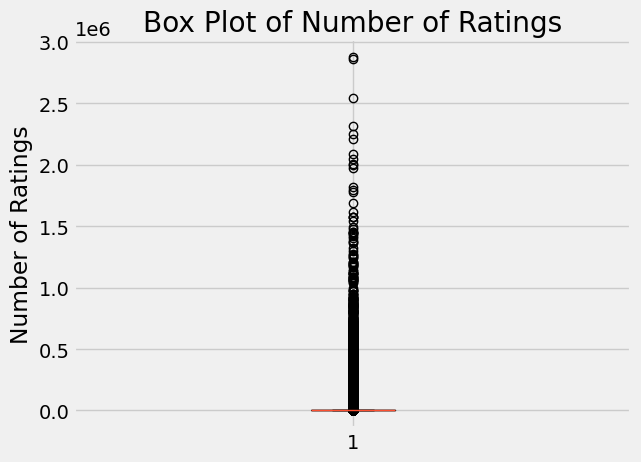

In [42]:
plt.boxplot(merged_df['Number of Ratings'].dropna())
plt.title("Box Plot of Number of Ratings")
plt.ylabel("Number of Ratings")
plt.show()

In [43]:
#####THIS HAS A HUGE INFLUENCE ON THE RESULTS AS IT CAN SKEW THE DISTRIBUTION OF DATA SO USE A MINIMUM NUMBER OF RATINGS THAT IS REASONABLE
# filter the "Number of Ratings" column to only include movies with at least 50 ratings
merged_df = merged_df[merged_df['Number of Ratings'] >= 300]

merged_df


,ID,Title Type,Title Name,Is Adult,Release Year,Runtime (minutes),Genres,Average Rating,Number of Ratings
5,tt0010323,movie,The Cabinet of Dr. Caligari,False,1920,67.00,"Horror,Mystery,Thriller",8.00,69801
17,tt0010962,movie,Deception,False,1920,133.00,"Biography,Drama,Romance",6.50,785
22,tt0010969,movie,Missing Husbands,False,1921,172.00,"Adventure,Fantasy,Mystery",6.70,424
26,tt0011000,movie,Leaves From Satan's Book,False,1920,167.00,Drama,6.60,1353
54,tt0011130,movie,Dr. Jekyll and Mr. Hyde,False,1920,69.00,"Drama,Horror,Sci-Fi",6.90,6028
...,...,...,...,...,...,...,...,...,...
344961,tt9911196,movie,The Marriage Escape,False,2020,103.00,"Comedy,Drama",7.40,3316
344964,tt9911774,movie,Padmavyuhathile Abhimanyu,False,2019,130.00,Drama,8.40,381
344972,tt9914192,movie,No Gogó do Paulinho,False,2020,98.00,Comedy,5.30,302
344989,tt9916270,movie,Il talento del calabrone,False,2020,84.00,Thriller,5.80,1476


In [44]:
merged_df.isnull().sum()

ID                     0
Title Type             0
Title Name             0
Is Adult               0
Release Year           0
Runtime (minutes)    508
Genres                 0
Average Rating         0
Number of Ratings      0
dtype: int64

In [45]:
#Since we need the runtime of the movies and less than 10% of the movie in our dataset don't have runtime values, we can exclude the movies without runtimes
merged_df = merged_df.dropna(subset=['Runtime (minutes)'])

merged_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 85143 entries, 5 to 344990
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 85143 non-null  object 
 1   Title Type         85143 non-null  object 
 2   Title Name         85143 non-null  object 
 3   Is Adult           85143 non-null  object 
 4   Release Year       85143 non-null  Int64  
 5   Runtime (minutes)  85143 non-null  float64
 6   Genres             85143 non-null  object 
 7   Average Rating     85143 non-null  float64
 8   Number of Ratings  85143 non-null  int64  
dtypes: Int64(1), float64(2), int64(1), object(5)
memory usage: 6.6+ MB


In [46]:
#Display the top 10 movies with the highest average ratings
merged_df.sort_values(by="Average Rating", ascending=False).head(10)

,ID,Title Type,Title Name,Is Adult,Release Year,Runtime (minutes),Genres,Average Rating,Number of Ratings
269096,tt28660608,movie,Ardhambardha Premakathe,False,2023,136.00,"Comedy,Romance",9.80,334
285339,tt3807352,movie,Chasing Red,False,2015,68.00,"Action,Adventure,Documentary",9.70,315
119486,tt0305663,movie,Illusory Thoughts,False,1989,72.00,"Documentary,Drama,Music",9.70,389
180040,tt11620828,tvMovie,Threat Level Midnight: The Movie,False,2011,25.00,"Action,Comedy",9.60,10933
268374,tt28435593,movie,Nimmellara Aashirvada,False,2023,124.00,"Comedy,Drama",9.60,610
235214,tt19382948,movie,Buddies,False,2022,140.00,Drama,9.50,530
231960,tt1852112,movie,Svet Koji Nestaje,False,1987,109.00,Documentary,9.50,365
265502,tt27525917,movie,Ramzan,False,2023,96.00,Drama,9.50,687
264395,tt27179211,movie,Yosi,False,2023,122.00,Thriller,9.50,478
267387,tt28080602,movie,90 Bidi Manig Nadi,False,2023,115.00,"Comedy,Crime",9.40,545


In [47]:
#Display the top 10 movies with the highest number of votes
merged_df.sort_values(by="Number of Ratings", ascending=False).head(10)

,ID,Title Type,Title Name,Is Adult,Release Year,Runtime (minutes),Genres,Average Rating,Number of Ratings
64423,tt0111161,movie,The Shawshank Redemption,False,1994,142.00,Drama,9.30,2877742
149337,tt0468569,movie,The Dark Knight,False,2008,152.00,"Action,Crime,Drama",9.00,2860204
199619,tt1375666,movie,Inception,False,2010,148.00,"Action,Adventure,Sci-Fi",8.80,2540943
75722,tt0137523,movie,Fight Club,False,1999,139.00,Drama,8.80,2313464
63524,tt0109830,movie,Forrest Gump,False,1994,142.00,"Drama,Romance",8.80,2247573
64238,tt0110912,movie,Pulp Fiction,False,1994,154.00,"Crime,Drama",8.90,2210820
157195,tt0816692,movie,Interstellar,False,2014,169.00,"Adventure,Drama,Sci-Fi",8.70,2086388
74352,tt0133093,movie,The Matrix,False,1999,136.00,"Action,Sci-Fi",8.70,2044847
35549,tt0068646,movie,The Godfather,False,1972,175.00,"Crime,Drama",9.20,2004225
70186,tt0120737,movie,The Lord of the Rings: The Fellowship of the Ring,False,2001,178.00,"Action,Adventure,Drama",8.90,1999849


In [49]:
#Finding the oldest and newest movie in the dataset by year
merged_df_sorted = merged_df.sort_values(by="Release Year", ascending=True)

oldest_movie = merged_df_sorted.iloc[0]
newest_movie = merged_df_sorted.iloc[-1]

print("Oldest Movie:")
print(oldest_movie)
print("\nNewest Movie:")
print(newest_movie)

Oldest Movie:
ID                                     tt0010323
Title Type                                 movie
Title Name           The Cabinet of Dr. Caligari
Is Adult                                   False
Release Year                                1920
Runtime (minutes)                          67.00
Genres                   Horror,Mystery,Thriller
Average Rating                              8.00
Number of Ratings                          69801
Name: 5, dtype: object

Newest Movie:
ID                                  tt18411490
Title Type                               movie
Title Name                             Tiger 3
Is Adult                                 False
Release Year                              2023
Runtime (minutes)                       155.00
Genres               Action,Adventure,Thriller
Average Rating                            5.80
Number of Ratings                        52834
Name: 231422, dtype: object


In [50]:
#Looking at correlation between the different numberical columns
numeric_cols = merged_df.select_dtypes(include=[np.number])
numeric_cols.corr()


,Release Year,Runtime (minutes),Average Rating,Number of Ratings
Release Year,1.00,0.10,-0.16,0.04
Runtime (minutes),0.10,1.00,0.17,0.10
Average Rating,-0.16,0.17,1.00,0.15
Number of Ratings,0.04,0.10,0.15,1.00


In [52]:
#Group movies by year and find the mean runtime, average rating and number of ratings for each year
yearly_avg_ratings = numeric_cols.groupby("Release Year").mean()

yearly_avg_ratings

,Runtime (minutes),Average Rating,Number of Ratings
Release Year,,,
1920,83.39,6.47,3825.42
1921,92.65,6.81,6052.58
1922,91.59,6.65,4775.03
1923,106.00,6.91,2895.56
1924,101.16,7.01,4088.73
...,...,...,...
2019,102.33,5.89,10485.06
2020,100.06,5.75,7177.90
2021,102.96,5.87,9255.15


In [53]:
yearly_avg_ratings.sort_values("Average Rating", ascending=False)

,Runtime (minutes),Average Rating,Number of Ratings
Release Year,,,
1924,101.16,7.01,4088.73
1928,88.29,6.97,3467.87
1923,106.00,6.91,2895.56
1925,90.22,6.90,5986.82
1927,93.32,6.88,6293.53
...,...,...,...
2013,100.73,5.85,17433.69
2015,100.16,5.85,12544.11
2012,99.36,5.84,16948.86


Text(0, 0.5, 'Average number of rating')

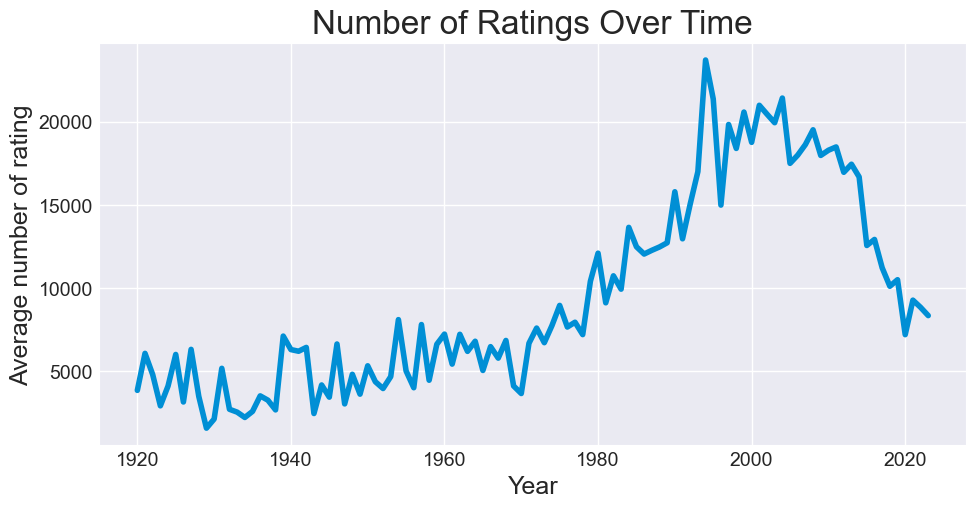

In [64]:
#Line Chart for number of ratings over time
sns.set_style("darkgrid")
plt.figure(figsize=(10, 5))
yearly_avg_ratings["Number of Ratings"].plot(kind='line')
plt.title("Number of Ratings Over Time", fontsize = 24)
plt.xlabel("Year", fontsize = 18 )
plt.ylabel('Average number of rating', fontsize = 18)

Text(0, 0.5, 'Average rating')

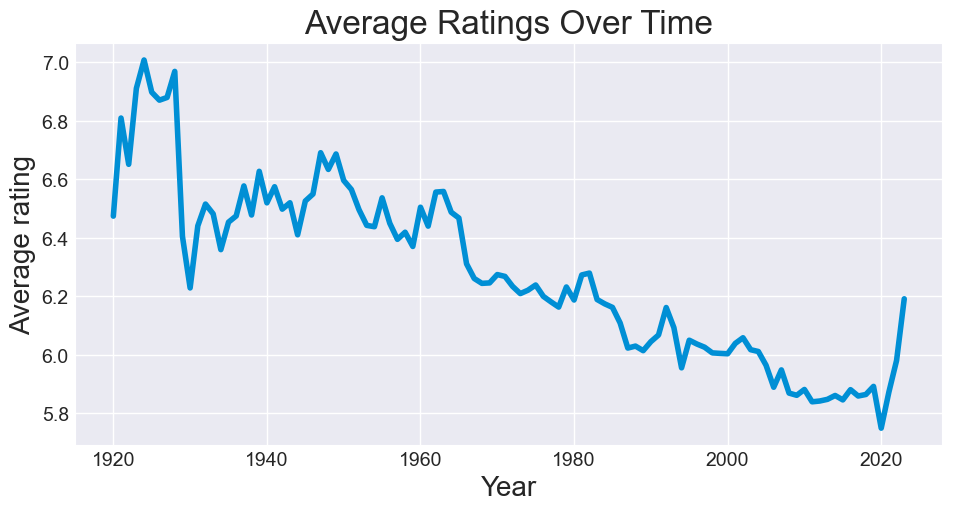

In [68]:
#Line chart for average ratings overtime

sns.set_style("darkgrid")
plt.figure(figsize=(10, 5))
yearly_avg_ratings["Average Rating"].plot(kind='line')
plt.title("Average Ratings Over Time", fontsize = 24)
plt.xlabel("Year", fontsize = 20 )
plt.ylabel('Average rating', fontsize = 20)

In [69]:
#Exploding genres to analyze the data by individual genres later

#create a copy of merged_df and name it merged_df2
merged_df2 = merged_df.copy()

# Split the 'Genres' column into a list of genres

merged_df2['Genres'] = merged_df2['Genres'].str.split(',')

# Explode the genres list into individual rows
exploded_genres_df = merged_df2.explode('Genres')

# Now, you can perform analyses on the exploded_genres_df DataFrame
# For example, to get the mean rating for each genre:
genre_mean_ratings = exploded_genres_df.groupby('Genres')['Average Rating'].mean()
genre_mean_ratings

Genres
Action        5.62
Adult         5.50
Adventure     5.84
Animation     6.48
Biography     6.82
Comedy        5.94
Crime         6.10
Documentary   7.12
Drama         6.30
Family        6.05
Fantasy       5.74
Film-Noir     6.65
Game-Show     6.90
History       6.74
Horror        4.91
Music         6.60
Musical       6.35
Mystery       5.81
News          7.17
Reality-TV    5.90
Romance       6.20
Sci-Fi        5.05
Sport         6.42
Talk-Show     7.20
Thriller      5.50
War           6.58
Western       6.06
Name: Average Rating, dtype: float64

In [70]:
exploded_genres_df

,ID,Title Type,Title Name,Is Adult,Release Year,Runtime (minutes),Genres,Average Rating,Number of Ratings
5,tt0010323,movie,The Cabinet of Dr. Caligari,False,1920,67.00,Horror,8.00,69801
5,tt0010323,movie,The Cabinet of Dr. Caligari,False,1920,67.00,Mystery,8.00,69801
5,tt0010323,movie,The Cabinet of Dr. Caligari,False,1920,67.00,Thriller,8.00,69801
17,tt0010962,movie,Deception,False,1920,133.00,Biography,6.50,785
17,tt0010962,movie,Deception,False,1920,133.00,Drama,6.50,785
...,...,...,...,...,...,...,...,...,...
344964,tt9911774,movie,Padmavyuhathile Abhimanyu,False,2019,130.00,Drama,8.40,381
344972,tt9914192,movie,No Gogó do Paulinho,False,2020,98.00,Comedy,5.30,302
344989,tt9916270,movie,Il talento del calabrone,False,2020,84.00,Thriller,5.80,1476
344990,tt9916362,movie,Coven,False,2020,92.00,Drama,6.40,5759


In [71]:
len(exploded_genres_df['Genres'].unique())

27

In [72]:
#Creating a new column called Movie Genre ID which has the original ID but a number to uniquely identify 
#The genre number for each movie as there are multiple rows of the same movies now

#Start by renaming the ID column to Movie ID
exploded_genres_df = exploded_genres_df.rename(columns={'ID': "Movie ID"})

# Create a new column that counts the occurrence of each Movie ID and adds 1 to make it start from 1
exploded_genres_df['Genre Number'] = exploded_genres_df.groupby('Movie ID').cumcount() + 1

# Generate the new Movie Genre ID column by combining Movie ID and Genre Number
exploded_genres_df['Movie Genre ID'] = exploded_genres_df['Movie ID'] + "-G" + exploded_genres_df['Genre Number'].astype(str)


exploded_genres_df


,Movie ID,Title Type,Title Name,Is Adult,Release Year,Runtime (minutes),Genres,Average Rating,Number of Ratings,Genre Number,Movie Genre ID
5,tt0010323,movie,The Cabinet of Dr. Caligari,False,1920,67.00,Horror,8.00,69801,1,tt0010323-G1
5,tt0010323,movie,The Cabinet of Dr. Caligari,False,1920,67.00,Mystery,8.00,69801,2,tt0010323-G2
5,tt0010323,movie,The Cabinet of Dr. Caligari,False,1920,67.00,Thriller,8.00,69801,3,tt0010323-G3
17,tt0010962,movie,Deception,False,1920,133.00,Biography,6.50,785,1,tt0010962-G1
17,tt0010962,movie,Deception,False,1920,133.00,Drama,6.50,785,2,tt0010962-G2
...,...,...,...,...,...,...,...,...,...,...,...
344964,tt9911774,movie,Padmavyuhathile Abhimanyu,False,2019,130.00,Drama,8.40,381,1,tt9911774-G1
344972,tt9914192,movie,No Gogó do Paulinho,False,2020,98.00,Comedy,5.30,302,1,tt9914192-G1
344989,tt9916270,movie,Il talento del calabrone,False,2020,84.00,Thriller,5.80,1476,1,tt9916270-G1
344990,tt9916362,movie,Coven,False,2020,92.00,Drama,6.40,5759,1,tt9916362-G1


In [73]:
#Reformat the datatable to remove the Genre Number column and place the Movie Genre ID at the start

exploded_genres_df = exploded_genres_df.drop('Genre Number', axis=1)

# Create a list of column names in the df with Movie Genre ID at the beginning
columns = ['Movie Genre ID'] + [col for col in exploded_genres_df if col != 'Movie Genre ID']

#Reorder the dataframe with the new list

exploded_genres_df = exploded_genres_df[columns]
exploded_genres_df


,Movie Genre ID,Movie ID,Title Type,Title Name,Is Adult,Release Year,Runtime (minutes),Genres,Average Rating,Number of Ratings
5,tt0010323-G1,tt0010323,movie,The Cabinet of Dr. Caligari,False,1920,67.00,Horror,8.00,69801
5,tt0010323-G2,tt0010323,movie,The Cabinet of Dr. Caligari,False,1920,67.00,Mystery,8.00,69801
5,tt0010323-G3,tt0010323,movie,The Cabinet of Dr. Caligari,False,1920,67.00,Thriller,8.00,69801
17,tt0010962-G1,tt0010962,movie,Deception,False,1920,133.00,Biography,6.50,785
17,tt0010962-G2,tt0010962,movie,Deception,False,1920,133.00,Drama,6.50,785
...,...,...,...,...,...,...,...,...,...,...
344964,tt9911774-G1,tt9911774,movie,Padmavyuhathile Abhimanyu,False,2019,130.00,Drama,8.40,381
344972,tt9914192-G1,tt9914192,movie,No Gogó do Paulinho,False,2020,98.00,Comedy,5.30,302
344989,tt9916270-G1,tt9916270,movie,Il talento del calabrone,False,2020,84.00,Thriller,5.80,1476
344990,tt9916362-G1,tt9916362,movie,Coven,False,2020,92.00,Drama,6.40,5759


In [75]:
# Add a column indicating the decade in which the movie was released

#Get the decade of the movie
def decade_generator(year):
    return (year //10) * 10

#Add the decade columnm to the data frame

exploded_genres_df["Decade"]= exploded_genres_df["Release Year"].apply(decade_generator)


In [76]:
exploded_genres_df

,Movie Genre ID,Movie ID,Title Type,Title Name,Is Adult,Release Year,Runtime (minutes),Genres,Average Rating,Number of Ratings,Decade
5,tt0010323-G1,tt0010323,movie,The Cabinet of Dr. Caligari,False,1920,67.00,Horror,8.00,69801,1920
5,tt0010323-G2,tt0010323,movie,The Cabinet of Dr. Caligari,False,1920,67.00,Mystery,8.00,69801,1920
5,tt0010323-G3,tt0010323,movie,The Cabinet of Dr. Caligari,False,1920,67.00,Thriller,8.00,69801,1920
17,tt0010962-G1,tt0010962,movie,Deception,False,1920,133.00,Biography,6.50,785,1920
17,tt0010962-G2,tt0010962,movie,Deception,False,1920,133.00,Drama,6.50,785,1920
...,...,...,...,...,...,...,...,...,...,...,...
344964,tt9911774-G1,tt9911774,movie,Padmavyuhathile Abhimanyu,False,2019,130.00,Drama,8.40,381,2010
344972,tt9914192-G1,tt9914192,movie,No Gogó do Paulinho,False,2020,98.00,Comedy,5.30,302,2020
344989,tt9916270-G1,tt9916270,movie,Il talento del calabrone,False,2020,84.00,Thriller,5.80,1476,2020
344990,tt9916362-G1,tt9916362,movie,Coven,False,2020,92.00,Drama,6.40,5759,2020


In [78]:
# Group by 'Genres' and 'Start Year' and calculate the mean rating
genre_year_avg_rating = exploded_genres_df.groupby(['Genres', 'Release Year'])['Average Rating'].mean()

# Pivot the table for better readability (optional)
pivot_table = genre_year_avg_rating.unstack(level=0)

print(pivot_table)

Genres        Action  Adult  Adventure  Animation  Biography  Comedy  Crime  \
Release Year                                                                  
1920            6.70    NaN       6.36        NaN       5.85    6.38   6.95   
1921            6.85    NaN       6.67        NaN        NaN    6.86   6.45   
1922            6.45    NaN       6.66        NaN       6.60    6.48   7.80   
1923            8.10    NaN       6.95        NaN       6.80    7.13    NaN   
1924            7.90    NaN       7.41        NaN        NaN    6.88   7.00   
...              ...    ...        ...        ...        ...     ...    ...   
2019            5.56    NaN       5.80       6.40       6.83    5.72   5.99   
2020            5.27    NaN       5.58       6.11       6.53    5.70   5.73   
2021            5.44    NaN       5.82       6.30       6.83    5.82   5.97   
2022            5.58    NaN       5.81       6.51       6.85    5.92   6.12   
2023            5.87    NaN       5.96       6.72   

In [79]:
#Selecting a subset of genres for analysis

selected_genres = ['Drama', 'Comedy', 'Action', 'Romance', 'Sci-Fi']  

# Filter the pivot table to include only the selected genres
filtered_pivot_table = pivot_table[selected_genres]



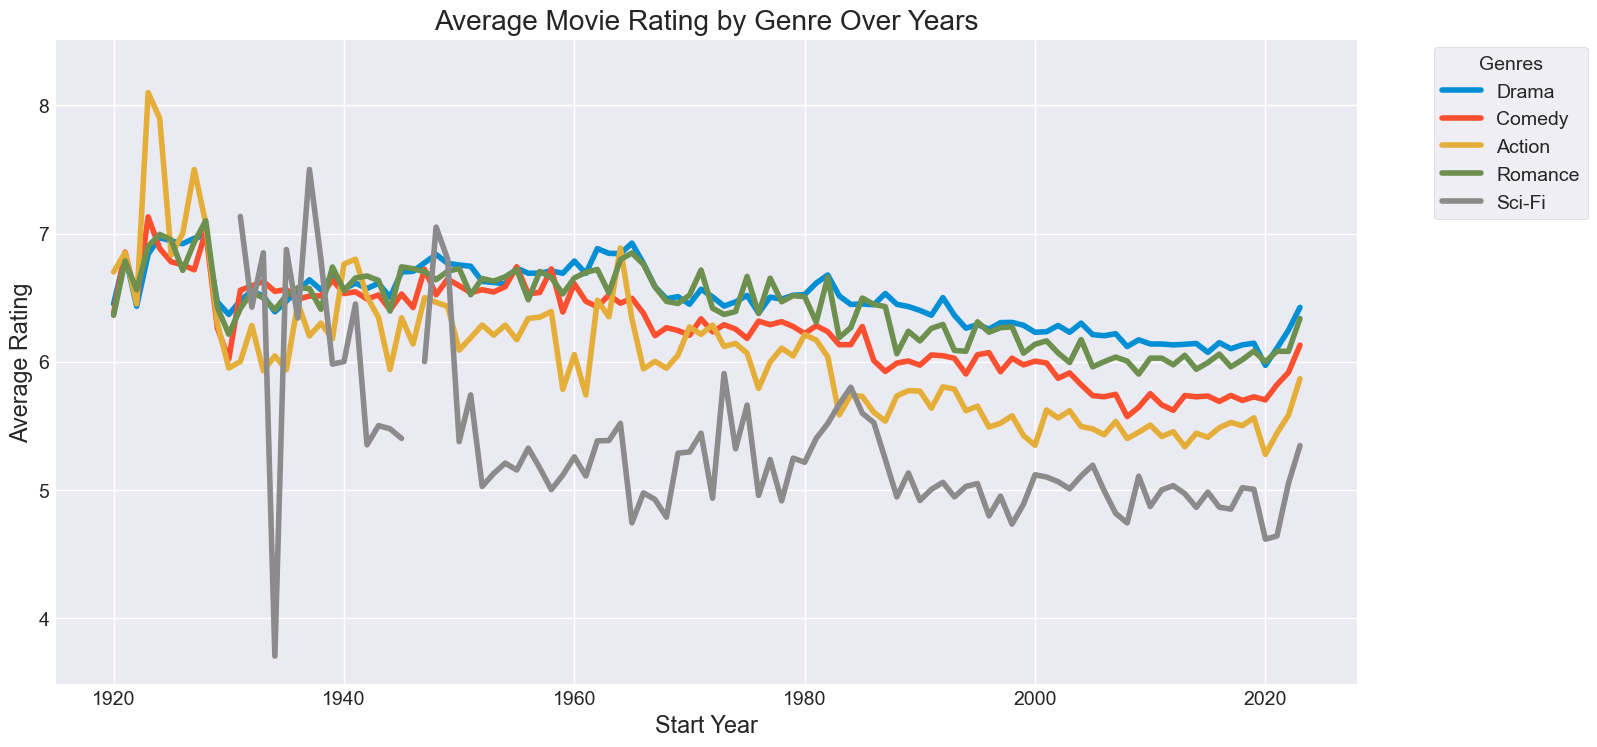

In [80]:
#plotting with all genres
#pivot_table.plot(kind='line', figsize=(15, 8))

#plotting results with subset of genres
filtered_pivot_table.plot(kind='line', figsize=(15, 8))


# Adding labels and title for clarity
plt.xlabel('Start Year')
plt.ylabel('Average Rating')
plt.title('Average Movie Rating by Genre Over Years')
plt.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Show the plot
plt.show()

In [55]:
#Next step- Calculate the correlation of ratings for each genres compared to the overall rating average over time. 

In [82]:
#Export the movies with ratings dataframe to a CSV file for data visualization in Tableau

exploded_genres_df.to_csv('IMDb_movie_ratingsNEW.csv', index=False)